# Exploration of the Real estate dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [80]:
dataset_path = './datasets/Housing_Price_Data.csv'
df = pd.read_csv(dataset_path)

In [66]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Visualization

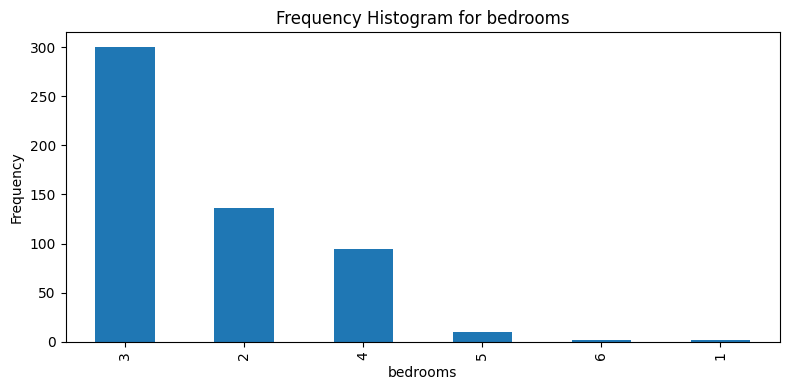

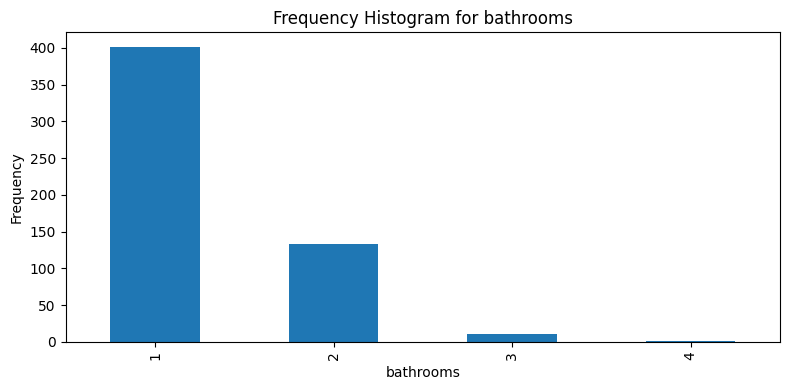

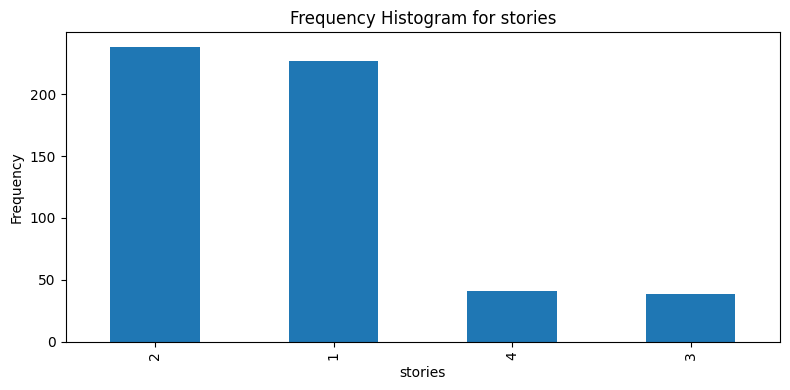

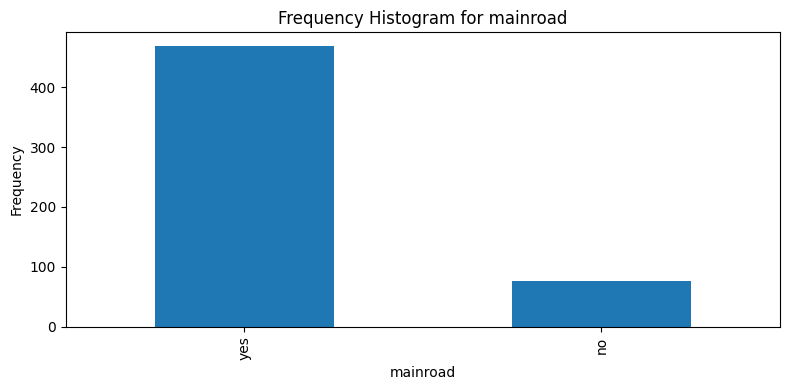

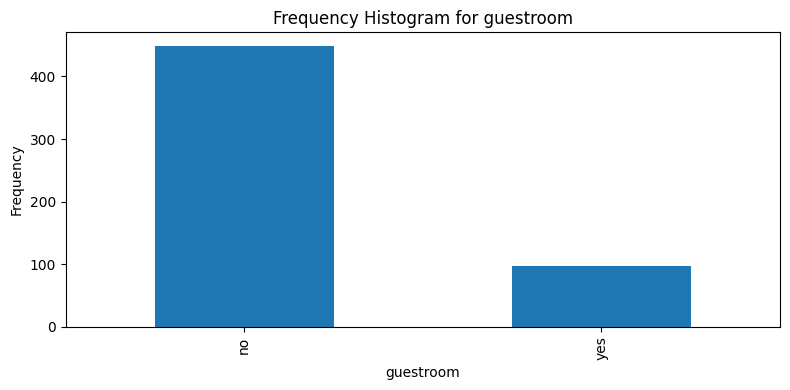

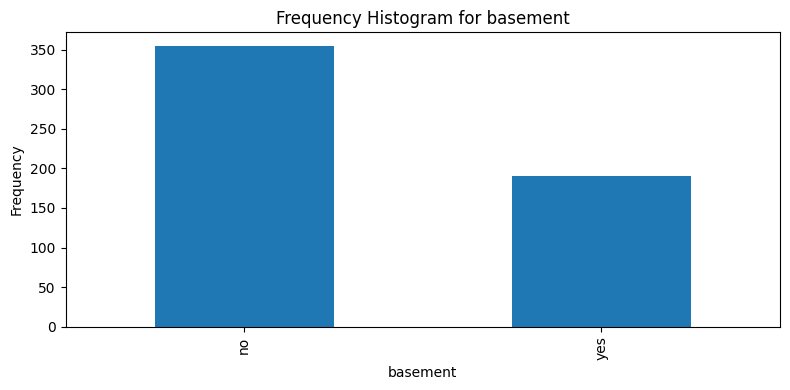

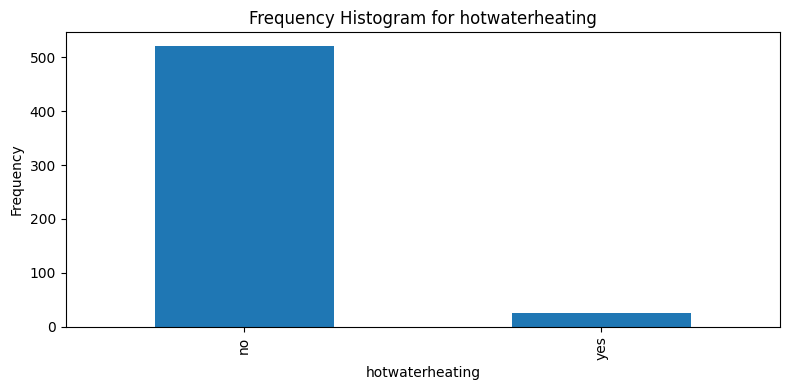

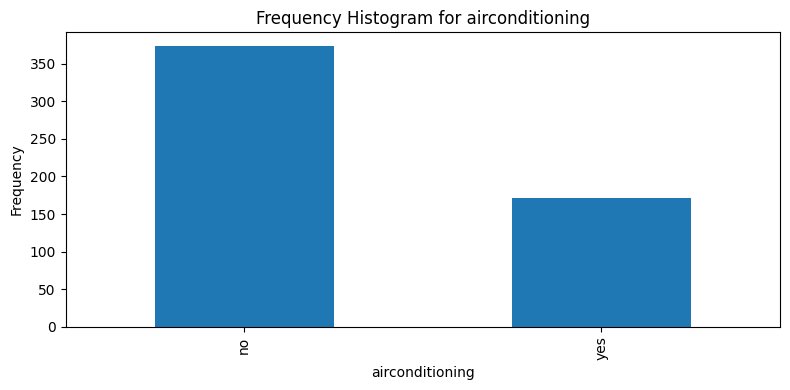

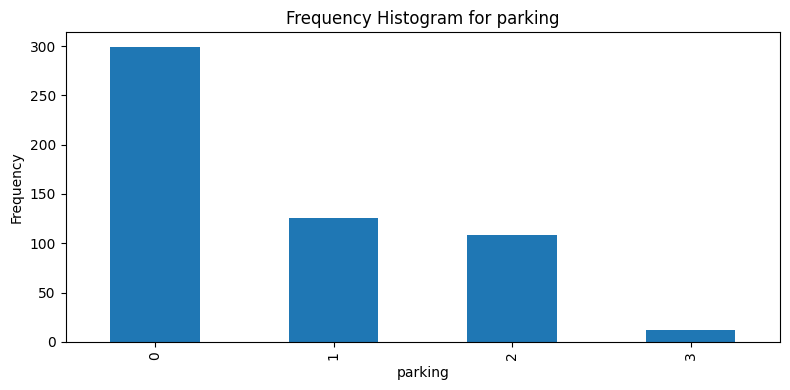

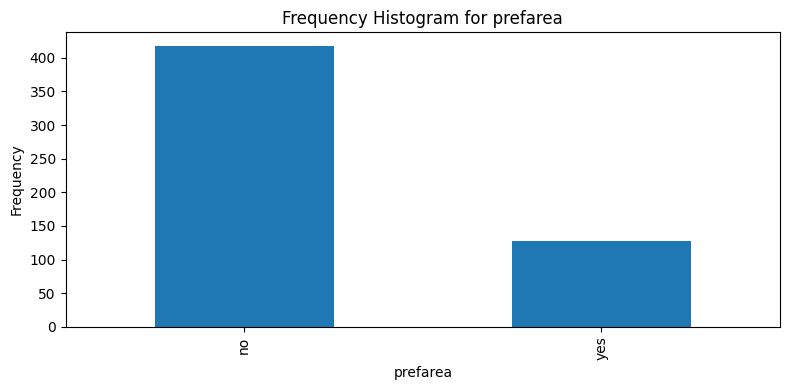

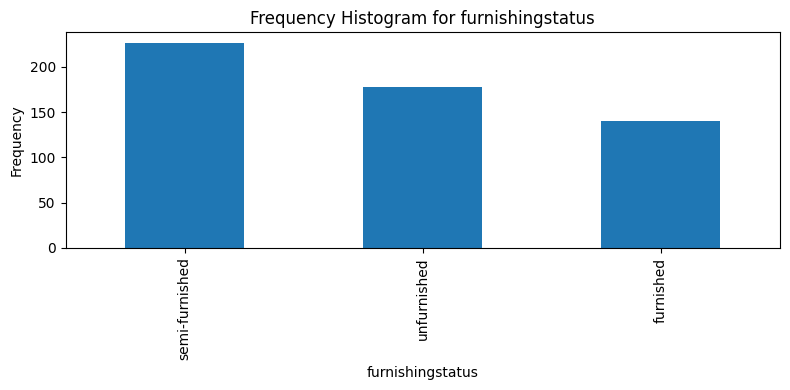

In [5]:
# Plot histogram of frequency for all elements in the dataframe
for col in df.columns[2:]:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

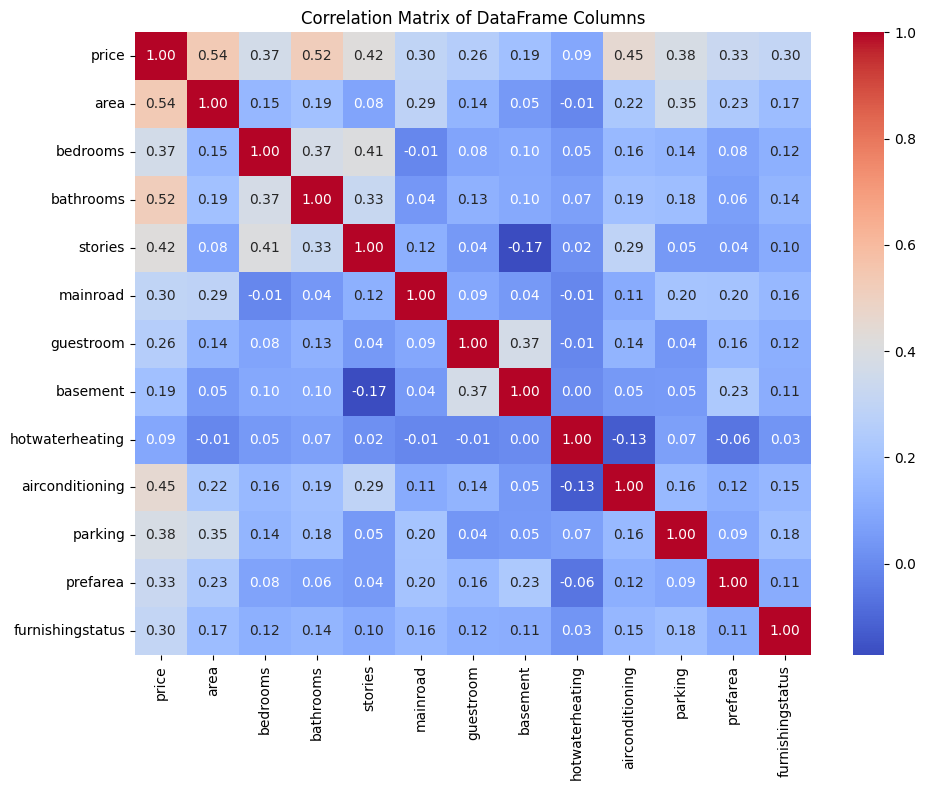

In [21]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of DataFrame Columns')
plt.tight_layout()
plt.show()

## Data preprocessing

encode binary labels

In [81]:
# Encode binary labels as 0/1
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

encode int labels

In [82]:
int_cols = ['bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']
for col in int_cols:
    df[col] = df[col] / max(df[col])

encode tragret price

In [83]:
df['price'] = (df['price'] - df['price'].min()) / (df['price'].max()-df['price'].min())

In [85]:
df.drop(['area'], axis=1, inplace=True)

In [86]:
df.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.666667,0.50,0.75,1,0,0,0,1,0.666667,1,1.0
1,0.909091,0.666667,1.00,1.00,1,0,0,0,1,1.000000,0,1.0
2,0.909091,0.500000,0.50,0.50,1,0,1,0,0,0.666667,1,0.5
3,0.906061,0.666667,0.50,0.50,1,0,1,0,1,1.000000,1,1.0
4,0.836364,0.666667,0.25,0.50,1,1,1,0,1,0.666667,0,1.0


In [87]:
df.describe()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.261189,0.494190,0.321560,0.451376,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.465138
std,0.161943,0.123011,0.125617,0.216873,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.380686
min,0.000000,0.166667,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.333333,0.250000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.224242,0.500000,0.250000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.345455,0.500000,0.500000,0.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Baseline regressor

In [88]:
# Simple MLP regressor to predict house price
X_reg = df.drop('price', axis=1)
y_reg = df['price']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [89]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(64,64), max_iter=100, random_state=0)
mlp_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = mlp_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"MLP Regressor Mean Squared Error: {mse:.2f}")

MLP Regressor Mean Squared Error: 0.02
